# EasyVisa

## Background

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. 

## Objective

Analyze the data provided and, with the help of a classification model:

To Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Key questions

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

### Data Dictionary

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status: Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats



# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

## Data Overview

In [3]:
data1 = pd.read_csv("EasyVisa.csv")  # Read dataset

<IPython.core.display.Javascript object>

In [4]:
data = (
    data1  # Copying dataset to another variable to avoid any changes to original data
)

<IPython.core.display.Javascript object>

In [5]:
data.head()  # First 5 observations

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

* There applicant has unique ID

In [6]:
data.shape  # Shape of dataset

(25480, 12)

<IPython.core.display.Javascript object>

* There are 25,480 rows and 12 columns


In [7]:
data.info()  # Checking info of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* All columns have same number of values.
* no_of_employees, yr_of_establishment and prevailing_wage are continuous variables.

In [8]:
data.duplicated().sum()  # Checking for duplicates

0

<IPython.core.display.Javascript object>

* There are no duplicated rows.

In [9]:
data.isnull().values.any()  # Checking for null values

False

<IPython.core.display.Javascript object>

* There are no null values.

In [10]:
data.describe(include="all")  # Data description for all columns

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV5745,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* More than 50% of applicants are from Asia.
* Most common education is Bachelors.
* About 50% of the applicants have job experience.
* Most of them do not require job training. 
* Minimum number of employees in some company is -26 (negative value) which is an error. Mean>75% percentile in this column. Maximum value is about 600,000 more than 75% percentile which shows there are outliers.
* Oldest year of establishment is 1800 which may or may not be an error. 
* There are 4 different units of wage. 
* Most of the applications are for full time positions.
* More than 50% of the visa applications have been Certified.

## EDA

### Univariate Analysis

In [11]:
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    p = sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.show()

<IPython.core.display.Javascript object>

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

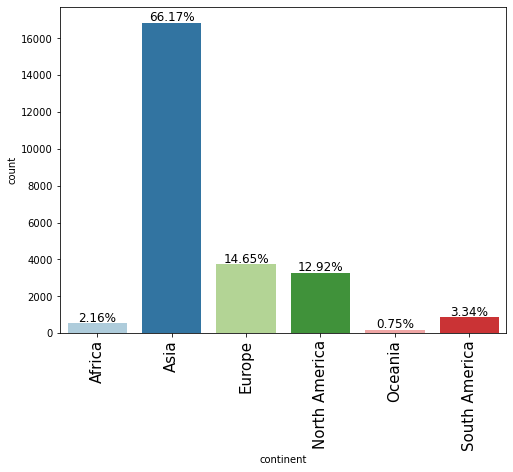

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(data, "continent", perc=True)

* 66% of the applicants are from Asia.
* 13% are from North America itself. They must be applying to change the type of Visa they are currently in.

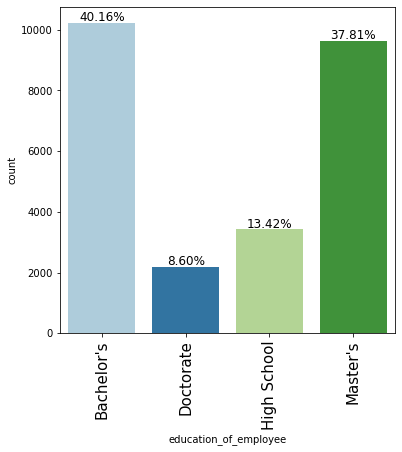

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(data, "education_of_employee", perc=True)

* 40% of the applicants hold a Bachelor's degree and 38% hold a Master's degree. 

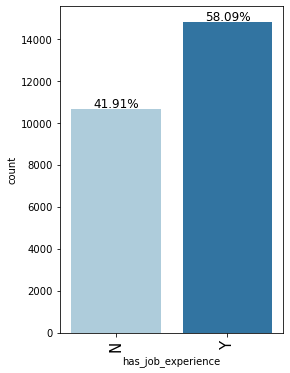

<IPython.core.display.Javascript object>

In [15]:
labeled_barplot(data, "has_job_experience", perc=True)

* 58% of applicants have job experience.

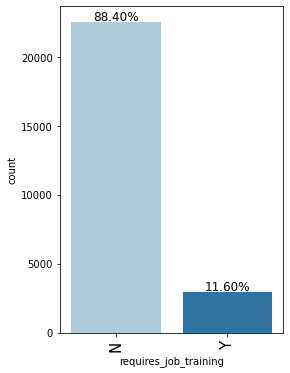

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(data, "requires_job_training", perc=True)

* 89% of the jobs do not require any job training. 

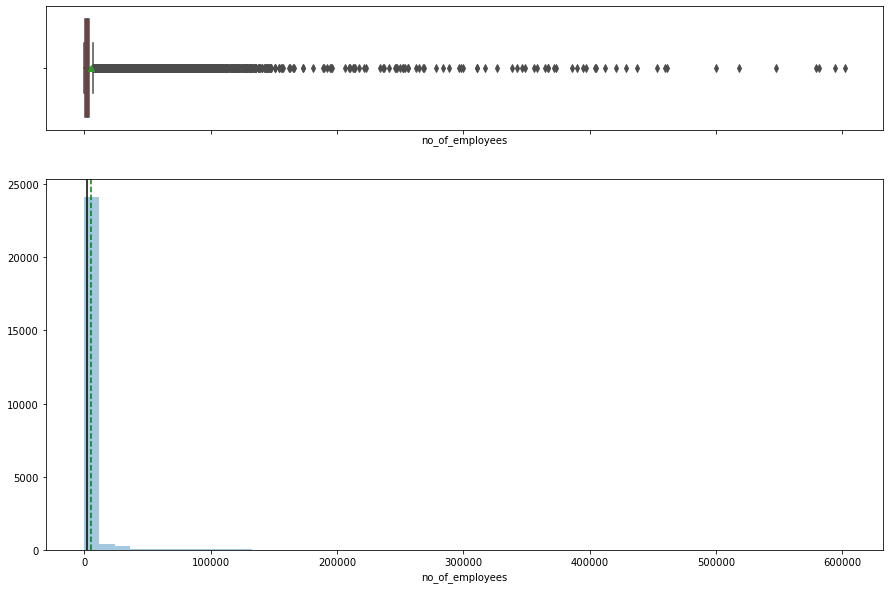

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(data["no_of_employees"])

<AxesSubplot:xlabel='no_of_employees'>

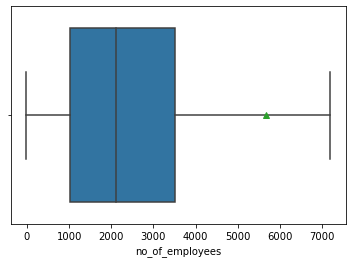

<IPython.core.display.Javascript object>

In [18]:
sns.boxplot(data=data, x="no_of_employees", showmeans=True, showfliers=False)

In [19]:
print(
    "Number of rows with less than 7000 employees: ",
    len(data[data["no_of_employees"] < 7000]),
)
print(
    "Number of rows with more than 7000 employees: ",
    len(data[data["no_of_employees"] > 7000]),
)

Number of rows with less than 7000 employees:  23915
Number of rows with more than 7000 employees:  1565


<IPython.core.display.Javascript object>

* Highly right skewed. 
* Mean and median are less than 7000 but many companies have more than 100,000 employees.

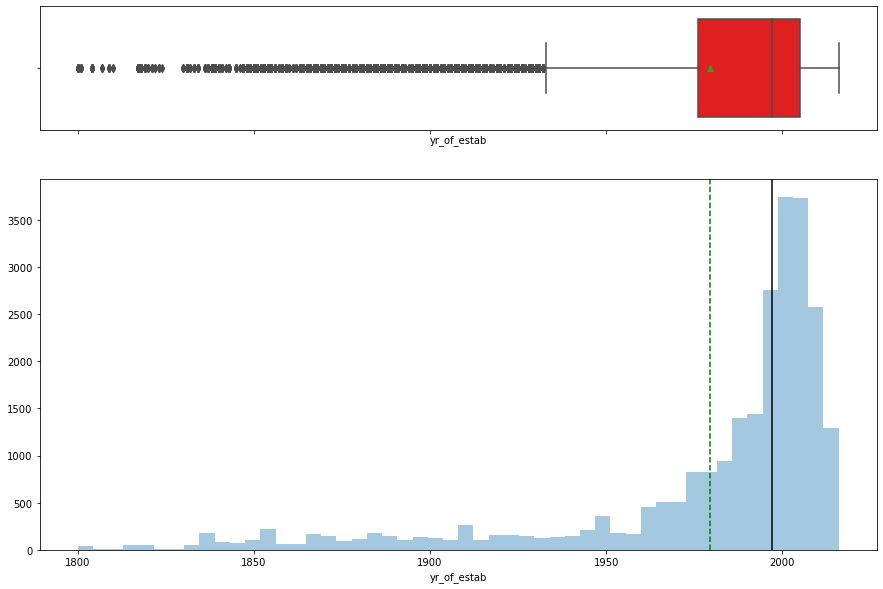

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data["yr_of_estab"])

* Highky left skewed.
* On an average the companies are fairly new, about 20 years old. 
* There are many companies more than 100 years old. 

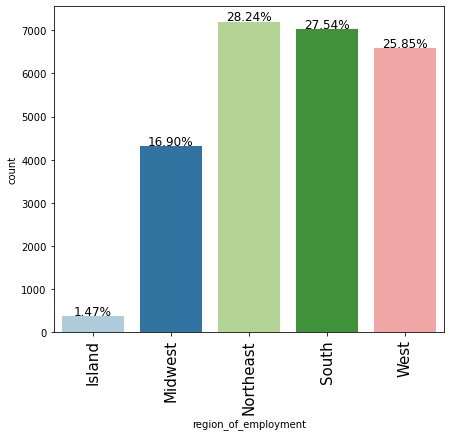

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "region_of_employment", perc=True)

* About 80% of companies offering jobs are from Northeast, South and West of United States.

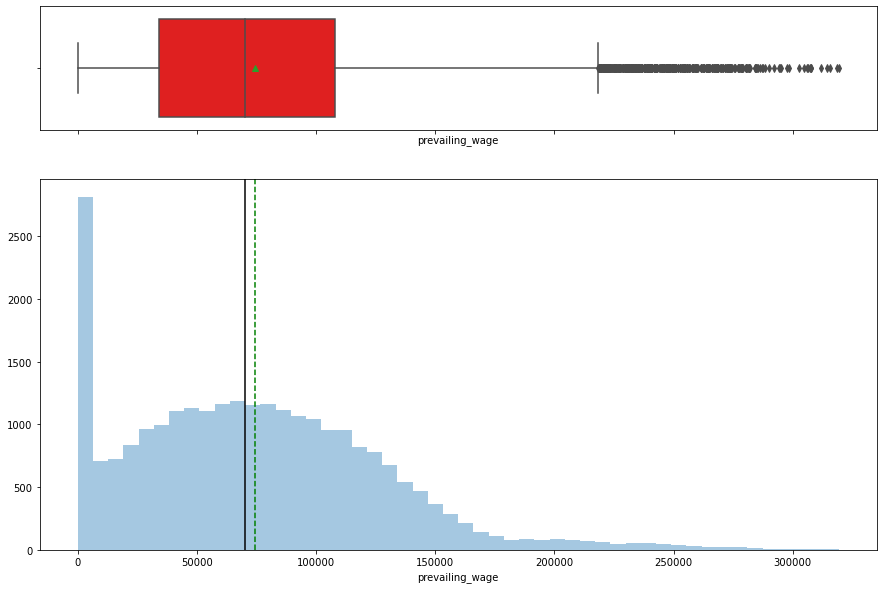

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data["prevailing_wage"])

* Right skewed
* Many values close to zero
* Median and mode about 75,000

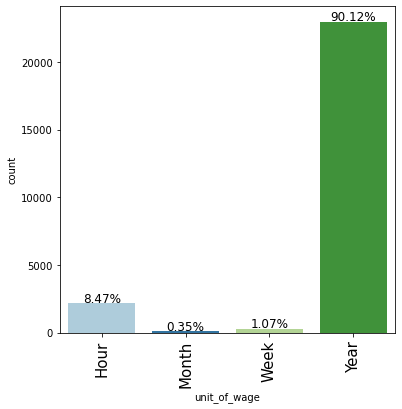

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "unit_of_wage", perc=True)

* Yearly wage is the most common unit of wage.

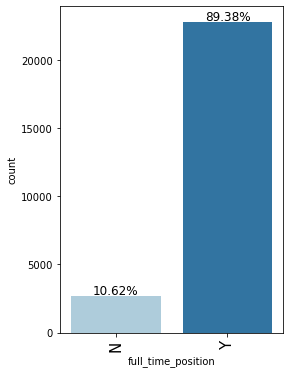

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "full_time_position", perc=True)

* 90% of the applications are for full time positions.

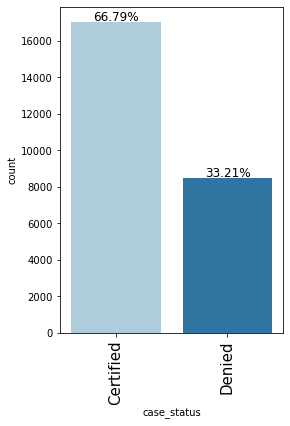

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "case_status", perc=True)

* Visa is certified for 67% of applications. 

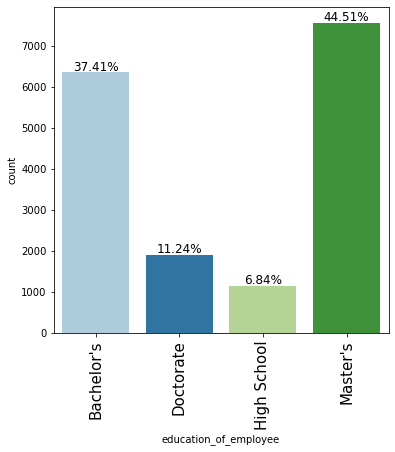

<IPython.core.display.Javascript object>

In [26]:
yes = data[data["case_status"] == "Certified"]
labeled_barplot(yes, "education_of_employee", perc=True)

* More than 80% of the approved cases have Master's or Bachelor's degrees.

## Bivariate Analysis

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [28]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution for " + target + "=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution for " + target + "=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 0],
        palette="gist_rainbow",
        showmeans=True,
    )

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        showmeans=True,
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


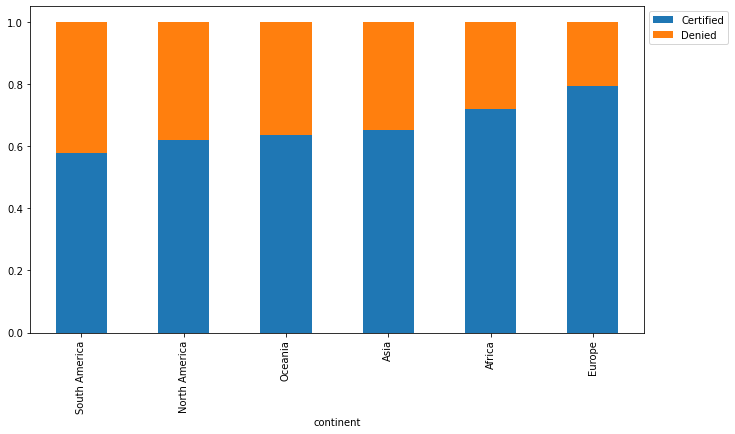

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(data, "continent", "case_status")

* For all the continents more than 50% of the applications are approved.
* Asia has the most number of certified applications.
* About 80% of the applications from Europe are certified.

**Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


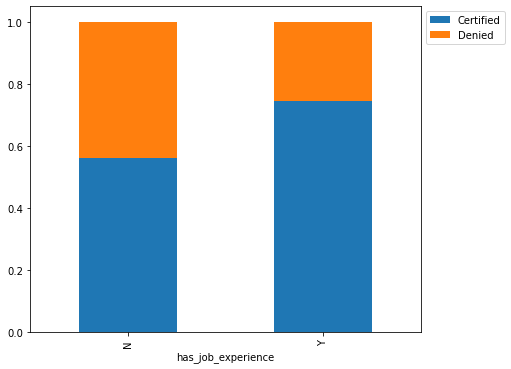

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "has_job_experience", "case_status")

* Almost 80% of the certified applicants have job experience.

**In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


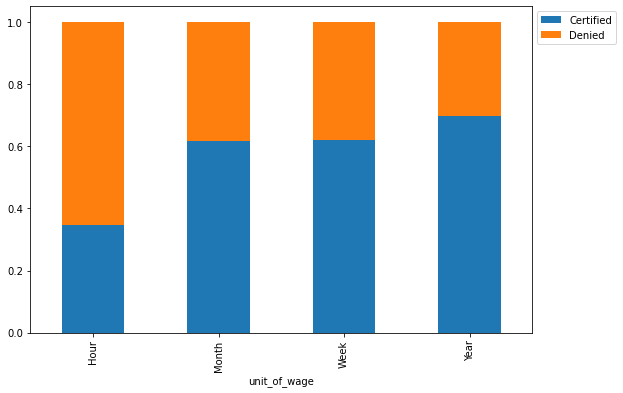

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(data, "unit_of_wage", "case_status")

* Yearly pay unit is most likely to be certified for a visa.

**The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

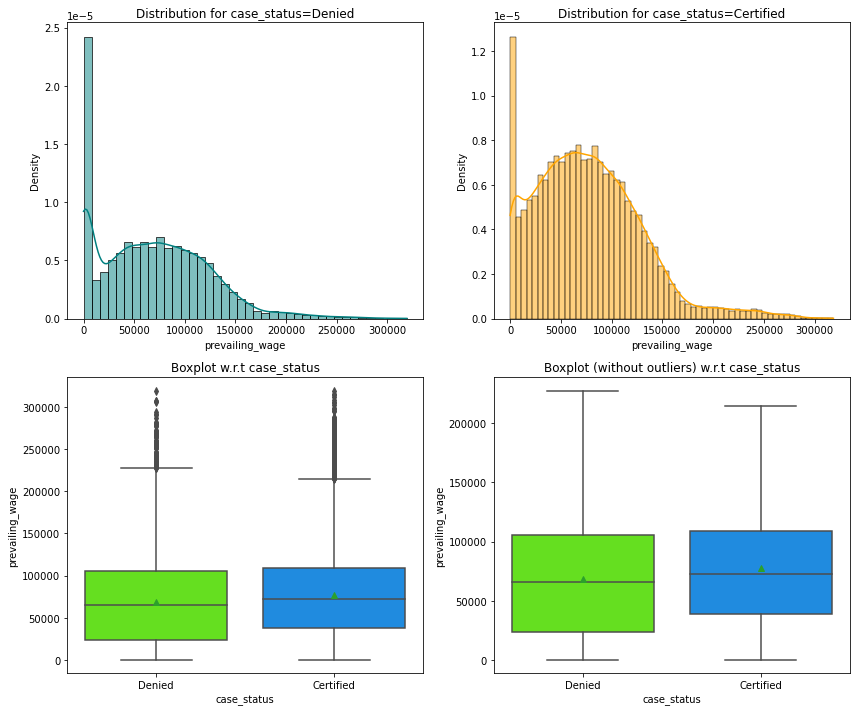

<IPython.core.display.Javascript object>

In [32]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

* Visa status is not affected much by prevailing wage. The range of prevailing wage is almost same for both certified and denied cases.  

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


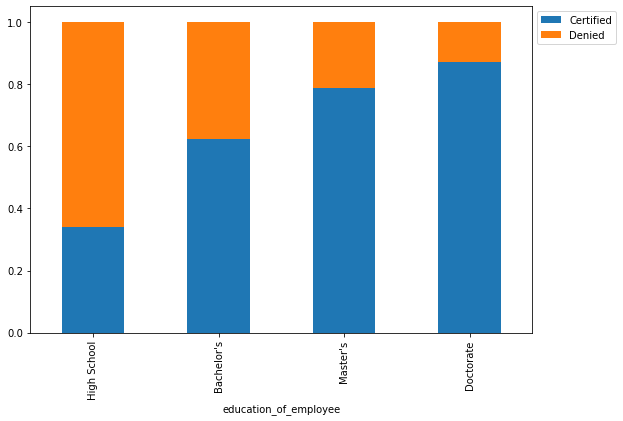

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "education_of_employee", "case_status")

* Number of Doctorate applications is the least but has the highest percentage (about 90%) of certified cases.
* 80% of Master's degree applications are certified. 
* Number of Bachelor's applications is the highest and about 60% of the cases are certified. 
* Number of High school applicants are low and only about 35% of them are certified.

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


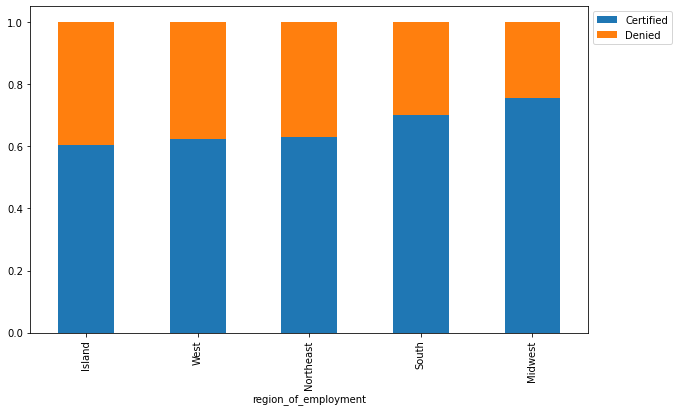

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "region_of_employment", "case_status")

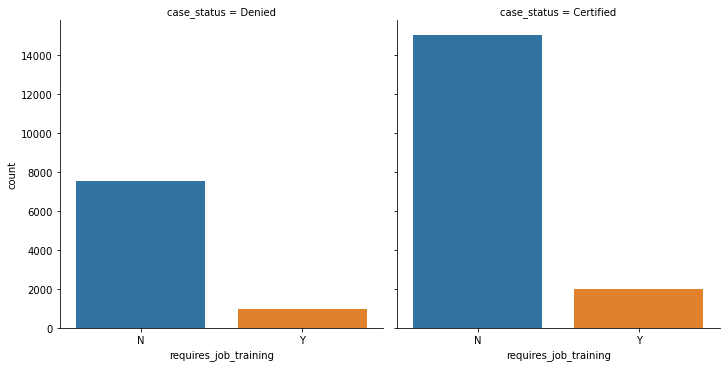

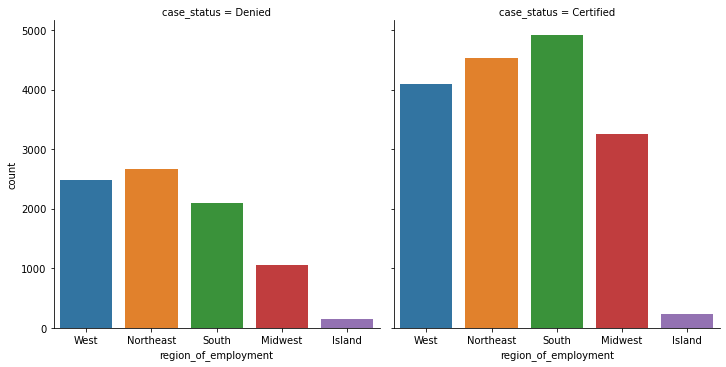

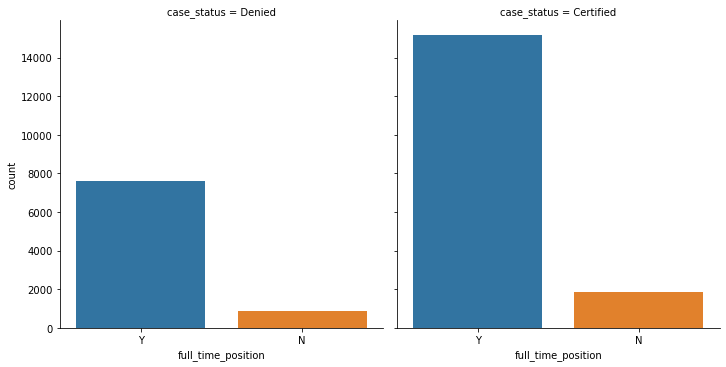

<IPython.core.display.Javascript object>

In [35]:
sns.catplot(
    data=data,
    x="requires_job_training",
    kind="count",
    col="case_status",
)
sns.catplot(
    data=data,
    x="region_of_employment",
    kind="count",
    col="case_status",
)
sns.catplot(
    data=data,
    x="full_time_position",
    kind="count",
    col="case_status",
)

* About 50% of the cases that were certified did not require a job training.
* Applications for South, Northeast and West have been certified more than other areas.
* About 50% of the cases that were certified were for full time position jobs. 

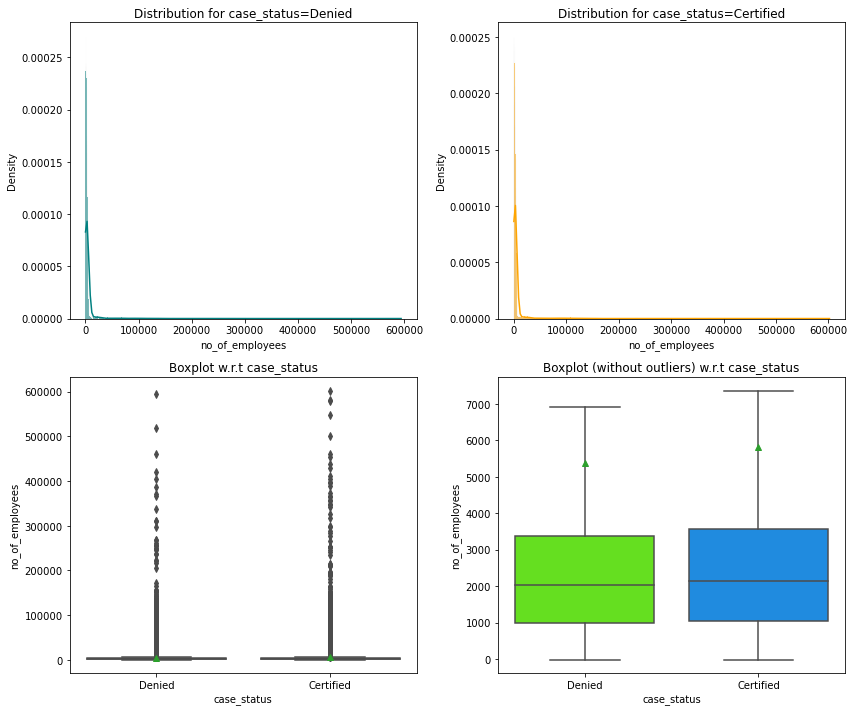

<IPython.core.display.Javascript object>

In [36]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

* Number of employees doesn't affect the case status. 
* It ranges from 0 to 600,000 in both certified and denied cases.

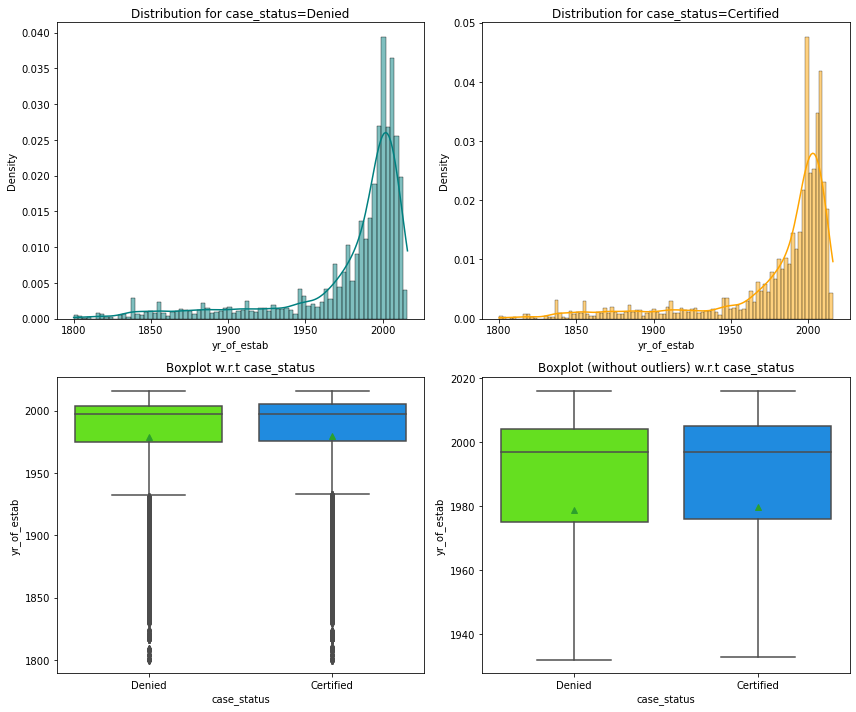

<IPython.core.display.Javascript object>

In [37]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

* For both certified and denied cases, range of year of establishment goes from 1800 to 2016.

<AxesSubplot:xlabel='continent', ylabel='count'>

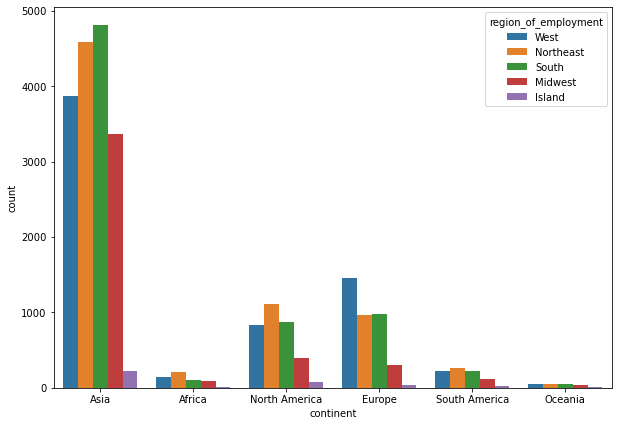

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(10, 7))
sns.countplot(
    data=data,
    x="continent",
    hue="region_of_employment",
)

* Most of the Asians want to go to South or Northease of United States.
* Many Europoeans have applied for jobs in West region.
* From other continents Northeast is a popular choice.

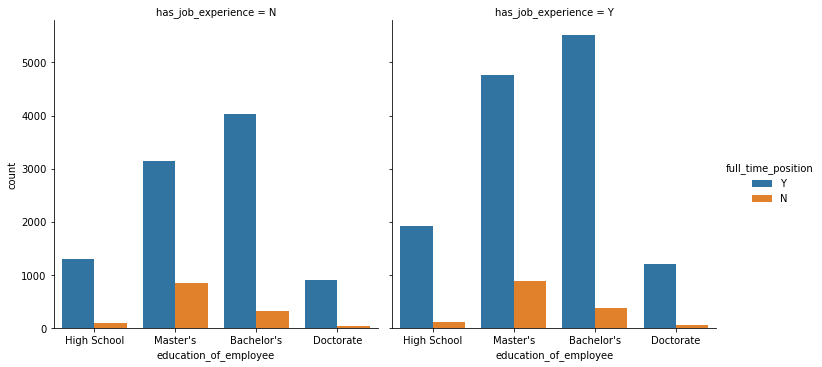

<IPython.core.display.Javascript object>

In [39]:
sns.catplot(
    data=data,
    x="education_of_employee",
    col="has_job_experience",
    hue="full_time_position",
    kind="count",
)

* Most of the applications are for full time positions. 
* In all education levels there are applicants with and without job experience. 

<AxesSubplot:xlabel='region_of_employment', ylabel='count'>

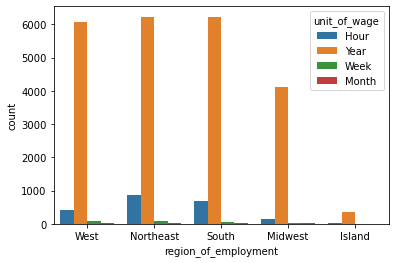

<IPython.core.display.Javascript object>

In [40]:
sns.countplot(data=data, x="region_of_employment", hue="unit_of_wage")

* In all regions Yearly wage is the most common unit of pat, followed by hour.

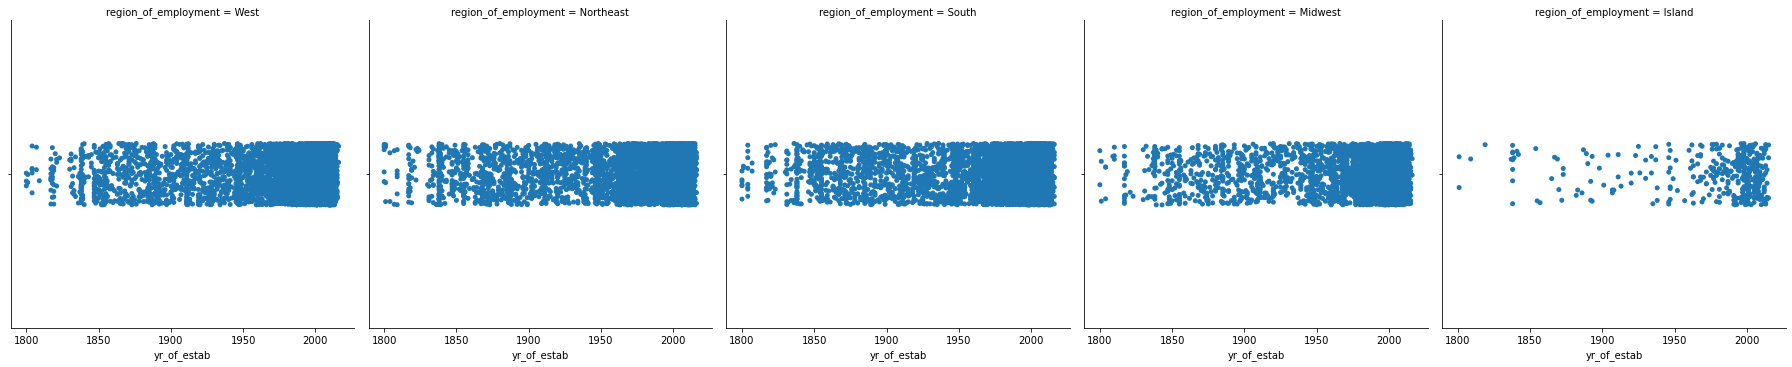

<IPython.core.display.Javascript object>

In [41]:
sns.catplot(data=data, x="yr_of_estab", col="region_of_employment", kind="strip")

* In all regions companies have been established from 1800s.

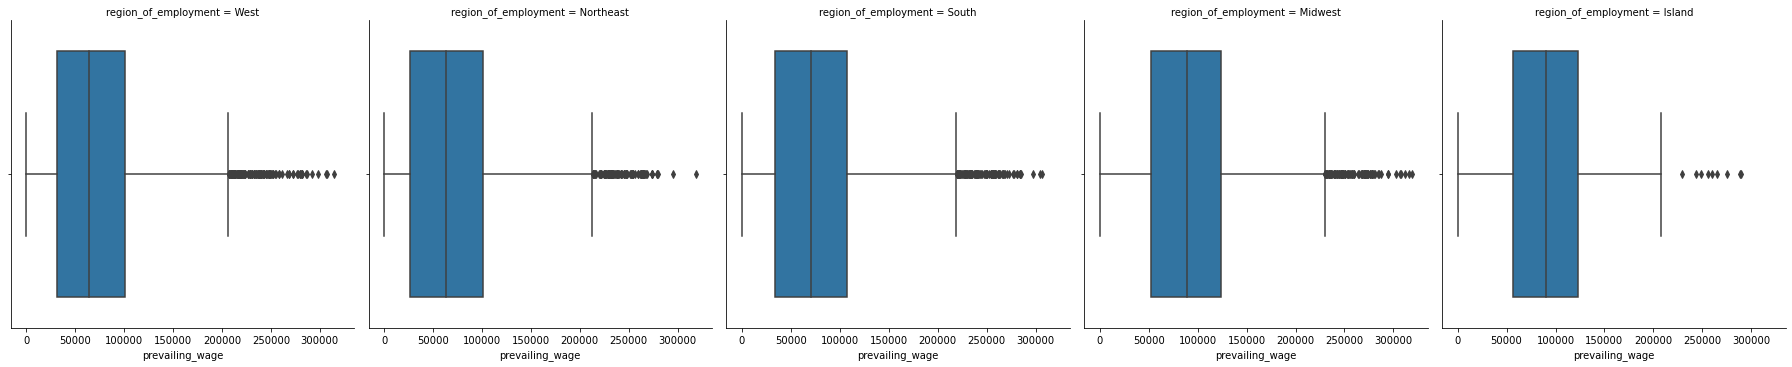

<IPython.core.display.Javascript object>

In [42]:
sns.catplot(data=data, col="region_of_employment", x="prevailing_wage", kind="box")

* In all regions Prevailing wage ranges upto more than 300,000

<AxesSubplot:xlabel='yr_of_estab', ylabel='no_of_employees'>

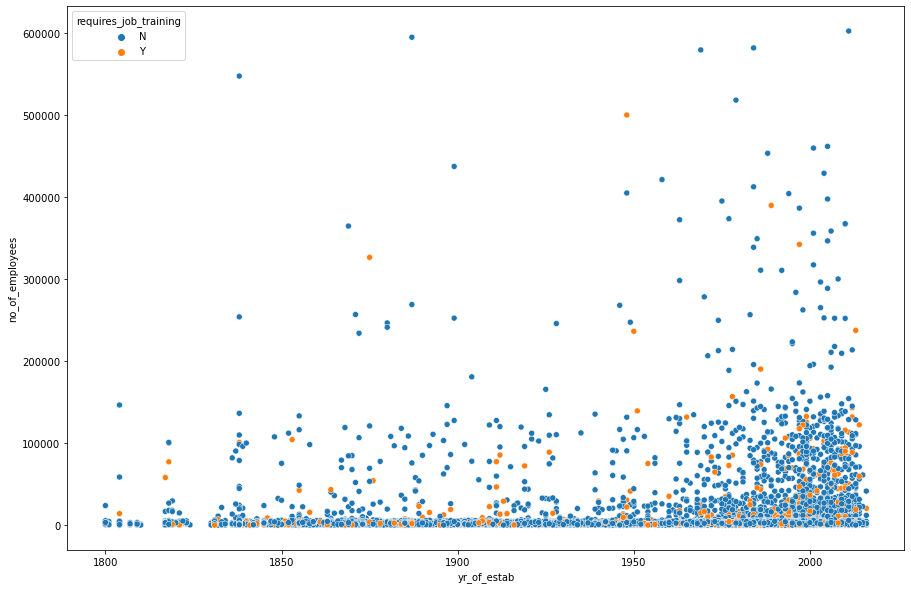

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=data, x="yr_of_estab", y="no_of_employees", hue="requires_job_training"
)

* Job training is mostly needed for companies with less than 100,000 employees.

In [44]:
emp_neg = data[data["no_of_employees"] < 0]
len(emp_neg)

33

<IPython.core.display.Javascript object>

* There are 33 applications where number of employees in the company being applied to is less than zero. This is an error and has to be rectified. 

**Certified cases**

In [45]:
certified = data[data["case_status"] == "Certified"]

<IPython.core.display.Javascript object>

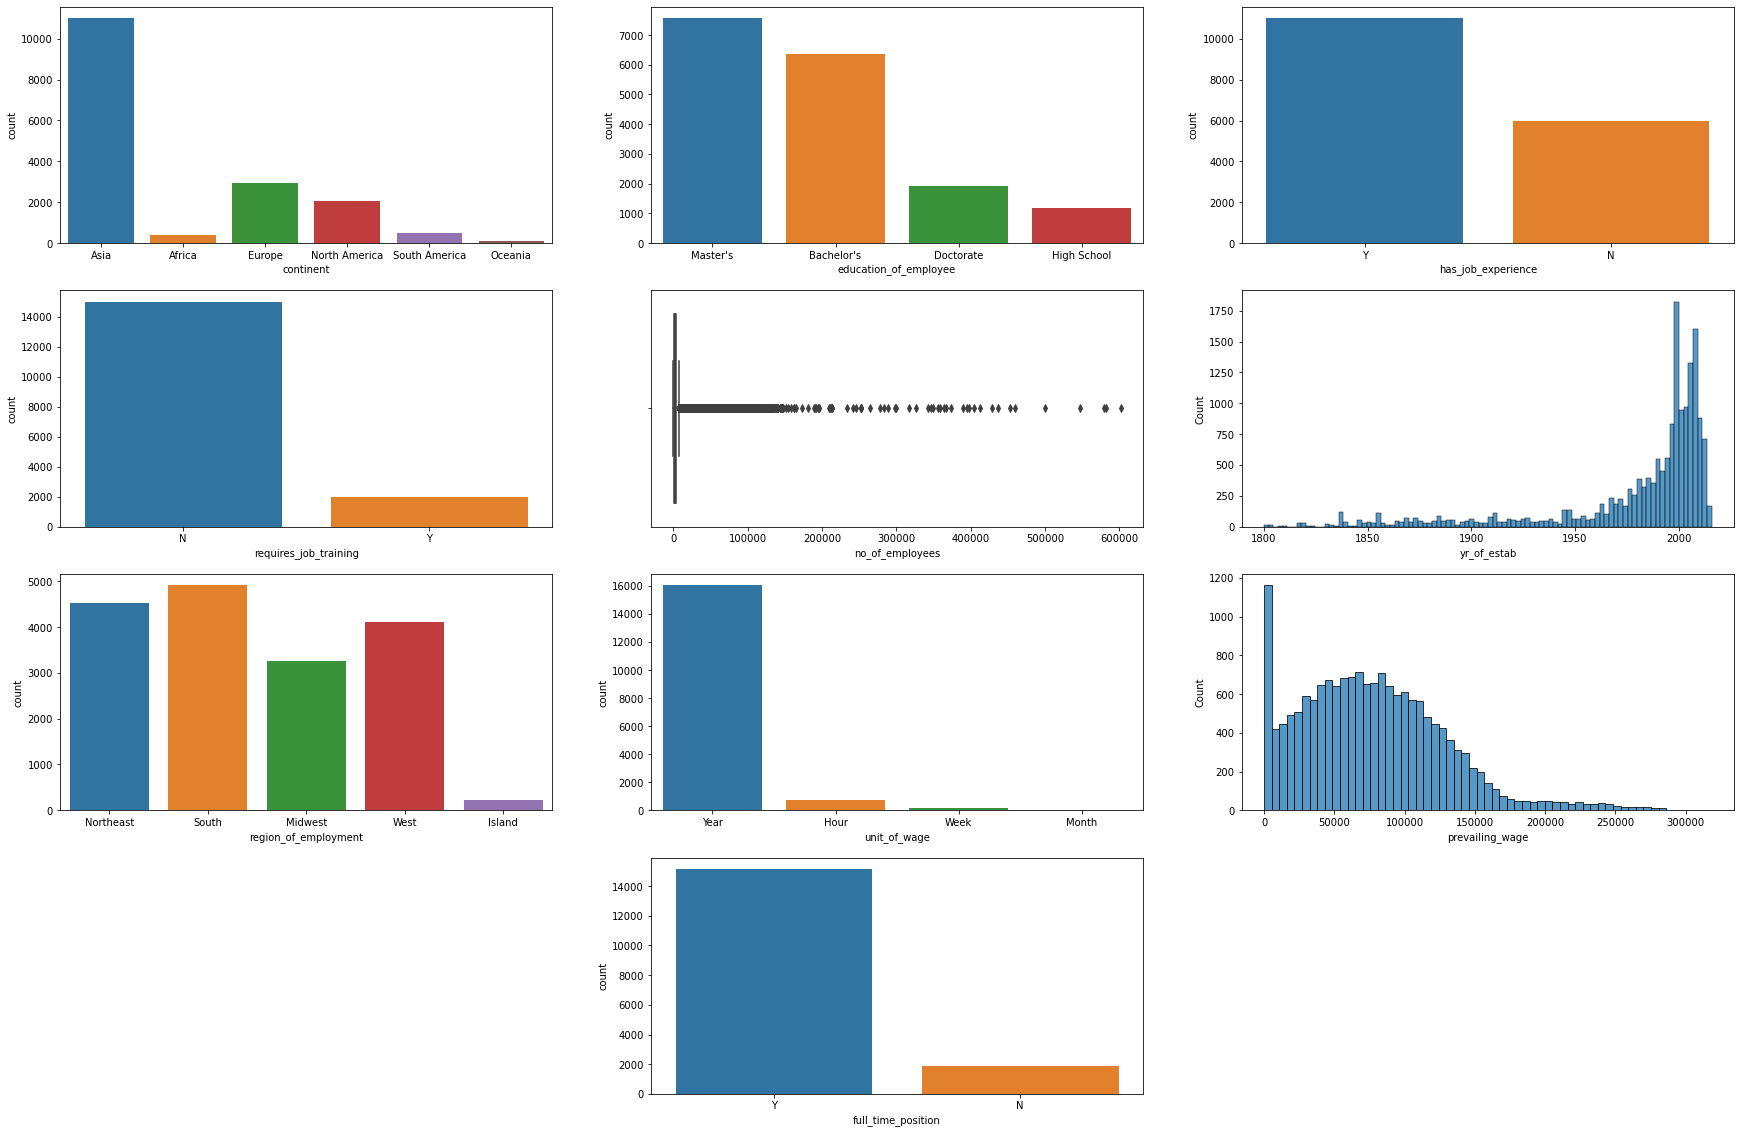

<IPython.core.display.Javascript object>

In [46]:
fig, axes = plt.subplots(4, 3, figsize=(30, 20))

sns.countplot(ax=axes[0, 0], data=certified, x="continent")
sns.countplot(ax=axes[0, 1], data=certified, x="education_of_employee")
sns.countplot(ax=axes[0, 2], data=certified, x="has_job_experience")
sns.countplot(ax=axes[1, 0], data=certified, x="requires_job_training")
sns.boxplot(ax=axes[1, 1], data=certified, x="no_of_employees")
sns.histplot(ax=axes[1, 2], data=certified, x="yr_of_estab")
sns.countplot(ax=axes[2, 0], data=certified, x="region_of_employment")
sns.histplot(ax=axes[2, 2], data=certified, x="prevailing_wage")
sns.countplot(ax=axes[2, 1], data=certified, x="unit_of_wage")
sns.countplot(ax=axes[3, 1], data=certified, x="full_time_position")
axes[3, 0].set_visible(False)
axes[3, 2].set_visible(False)

* Most of the cases are from Asia.
* Most common Education is Master's, only about 1000 Highschool applicants and about 2000 Docotrate applicants have been certified.
* Most of them have job experience.
* Most of them doesn't require job training.
* Number of employees is companies range upto 600,000.
* Year of establishment ranges from 1800 to 2016.
* South is the region of employment with highest cases.
* Year is the most common unit of wage.
* Prevailing wage ranges upto 300,000.
* Most of the jobs are full time positions. 

**Denied cases**

In [47]:
denied = data[data["case_status"] == "Denied"]

<IPython.core.display.Javascript object>

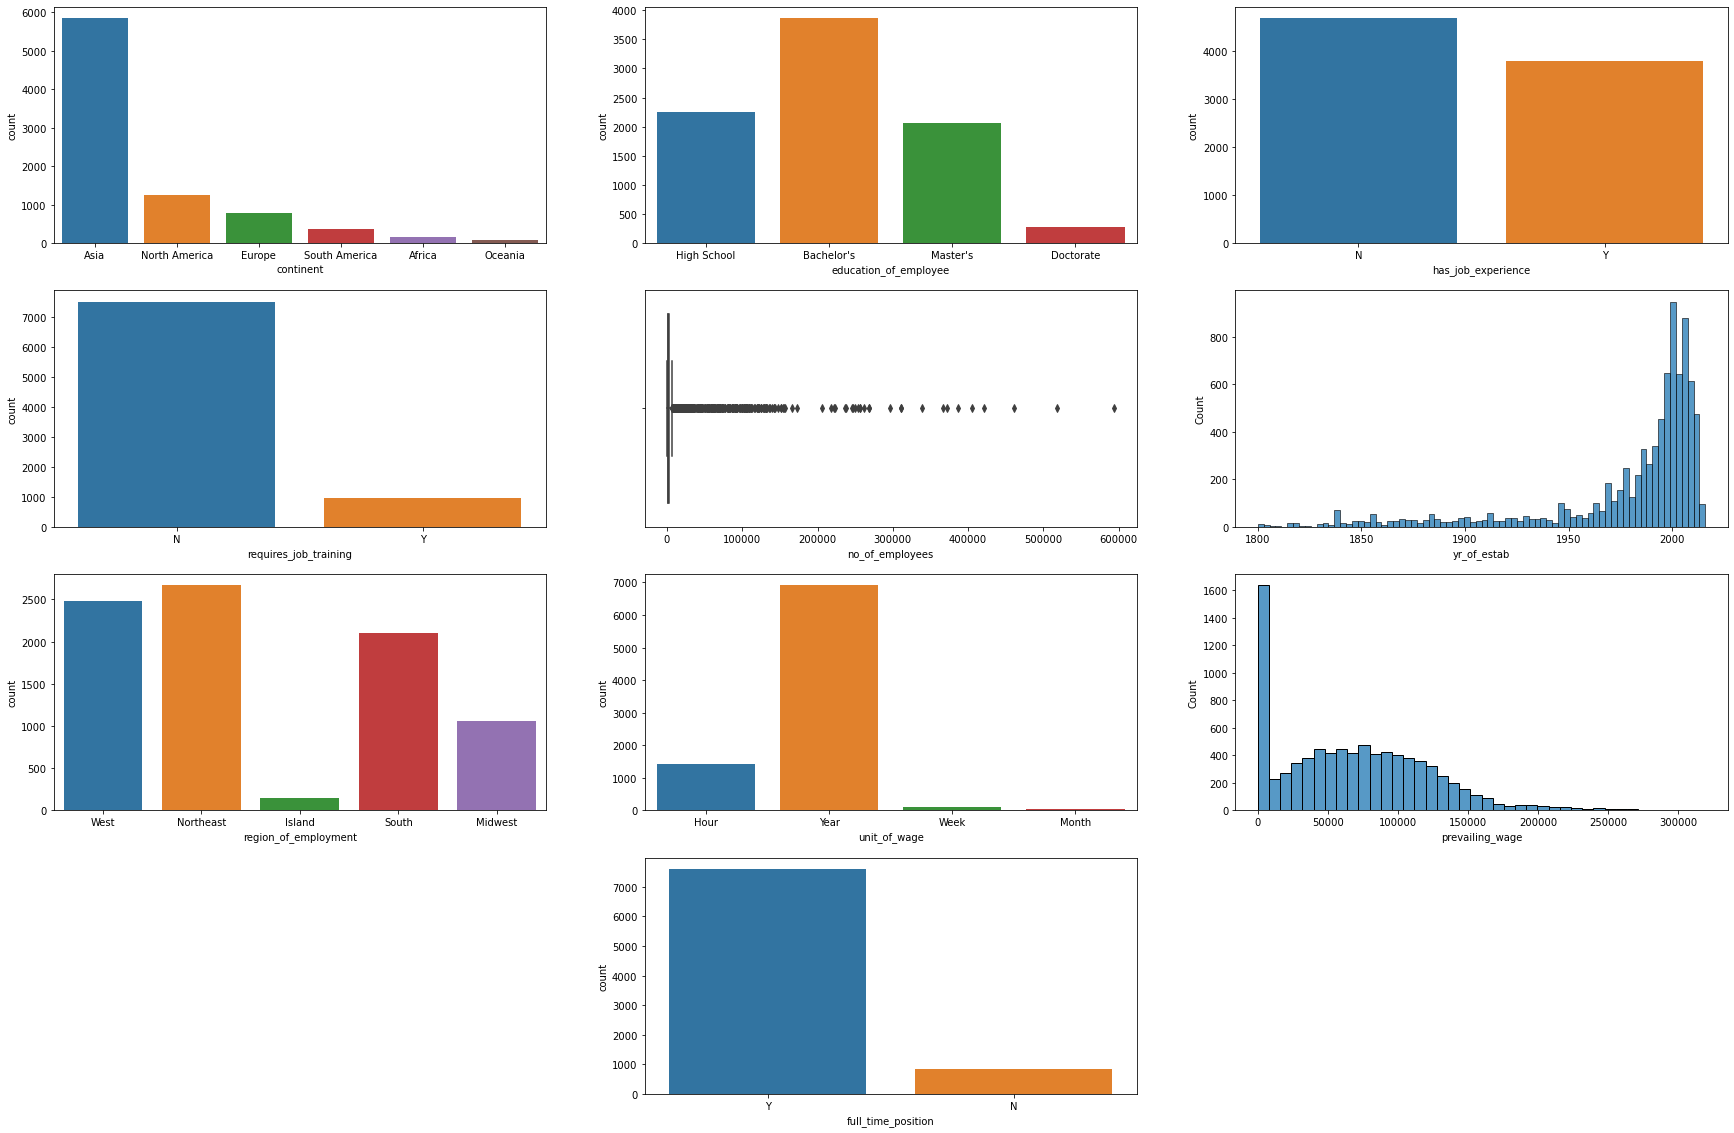

<IPython.core.display.Javascript object>

In [48]:
fig, axes = plt.subplots(4, 3, figsize=(30, 20))

sns.countplot(ax=axes[0, 0], data=denied, x="continent")
sns.countplot(ax=axes[0, 1], data=denied, x="education_of_employee")
sns.countplot(ax=axes[0, 2], data=denied, x="has_job_experience")
sns.countplot(ax=axes[1, 0], data=denied, x="requires_job_training")
sns.boxplot(ax=axes[1, 1], data=denied, x="no_of_employees")
sns.histplot(ax=axes[1, 2], data=denied, x="yr_of_estab")
sns.countplot(ax=axes[2, 0], data=denied, x="region_of_employment")
sns.histplot(ax=axes[2, 2], data=denied, x="prevailing_wage")
sns.countplot(ax=axes[2, 1], data=denied, x="unit_of_wage")
sns.countplot(ax=axes[3, 1], data=denied, x="full_time_position")
axes[3, 0].set_visible(False)
axes[3, 2].set_visible(False)

* Most of the cases are from Asia.
* Most common Education is Bachelor's, more than 2000 Highschool applicants and less than 500 Docotrate applicants have been denied.
* Most of them do not have job experience.
* Most of them doesn't require job training.
* Number of employees is companies range upto 600,000.
* Year of establishment ranges from 1800 to 2016.
* Northeast is the region of employment with highest cases, followed by West.
* Year is the most common unit of wage.
* Prevailing wage ranges upto 300,000.
* Most of the jobs are full time positions. 

## Insights from EDA

### Data Description

* There were no duplicates.
* There are some missing values in the form of negative values for number of employees.
* Some variables are object type which can be converted to categorical type.
* case_status is the dependent variable with values Certified and Denied which can be mapped to 1 and 0 respectively.

### Observations:

* 66% of the applicants are from Asia. 13% are from North America itself. They must be applying to change the type of Visa they are currently in. For all the continents more than 50% of the applications are approved. About 80% of the applications from Europe are certified.
* About 80% of the applicants hold Master's or Bachelor's degree. Number of Doctorate applications is the least but has the highest percentage (about 90%) of certified cases. Number of Highschool applicants are low and only about 35% of them are certified.
* 58% of applicants have job experience. 
* 89% of the jobs do not require any job training. Job training is mostly needed for companies with less than 100,000 employees.
* Number of employees range upto 600,000. 
* There are companies as old as 1800s. Most of them have been established around the year 2000 and later.
* About 80% of companies offering jobs are from Northeast, South and West of United States. Applications for South, Northeast and West have been certified more than other areas. Most of the Asians want to go to South or Northease of United States. Many Europoeans have applied for jobs in West region.
* Prevailing wage ranges upto 300,000 for all units of wage.
* Year is the most common unit of wage.
* 90% of the applications are for full time positions.
* Visa is certified for 67% of applications.

### Key Questions

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
> Yes, education does play a role in Visa certification. More than 80% of the approved cases have Master's or Bachelor's degrees. Number of Doctorate applications is the least but has the highest percentage (about 90%) of certified cases. 
2. How does the visa status vary across different continents?
> For all the continents more than 50% of the applications are approved. Asia has the most number of certified applications. About 80% of the applications from Europe are certified.
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
> Yes, Almost 80% of the certified applicants have job experience.
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
> Yearly pay unit is most likely to be certified for a visa.
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
> Visa status is not affected much by prevailing wage. The range of prevailing wage is almost same for both certified and denied cases.

## Data Preprocessing

### Changing Datatypes

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

Changing datatypes of object variables to categorical variables:

In [50]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if data[feature].dtype == "object":  # Only apply for columns with object type
        data[feature] = pd.Categorical(data[feature])  # Change datatype to Categorical

<IPython.core.display.Javascript object>

### Feature Engineering

"case_id" is unique for each row and so will not contribute to the models. It should be dropped:

In [51]:
data.drop(columns="case_id", inplace=True)

<IPython.core.display.Javascript object>

### Missing value treatment

For applications with negative "no_of_employees", absolute value of the negative number can be taken:

In [52]:
data.loc[(data["no_of_employees"] < 0), "no_of_employees"] = abs(
    data["no_of_employees"]
)

<IPython.core.display.Javascript object>

### Outlier detection

Outliers need to be treated for continuous data.
no_of_employees, yr_of_estab and prevailing_wage are continuous variables.

<AxesSubplot:xlabel='no_of_employees'>

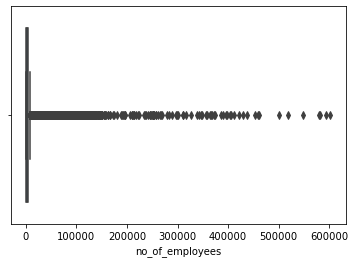

<IPython.core.display.Javascript object>

In [53]:
sns.boxplot(data=data, x="no_of_employees")

* Hourly wages are close to zero and yearly wages range upto 600,000. So they cannot be removed from the data.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.5 KB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='yr_of_estab'>

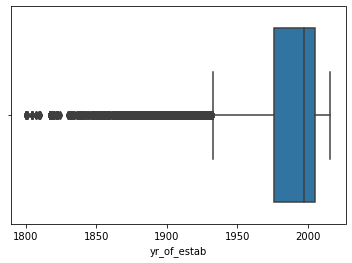

<IPython.core.display.Javascript object>

In [55]:
sns.boxplot(data=data, x="yr_of_estab")

* There are many companies as old as 1800 with number of employess in the range of 1000s. So they cannot be removed. 

<AxesSubplot:xlabel='prevailing_wage'>

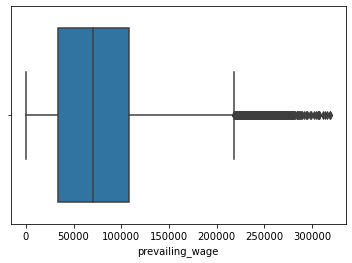

<IPython.core.display.Javascript object>

In [56]:
sns.boxplot(data=data, x="prevailing_wage")

* Many are high paying jobs with yearly salary ranging upto 300,000. All of them cannot be removed

### Data Preparation for modeling

In [57]:
# Create a struct with corresponding conversion values
replaceStruct = {
    "continent": {
        "Asia": 1,
        "Europe": 2,
        "North America": 3,
        "South America": 4,
        "Africa": 5,
        "Oceania": 6,
    },
    "education_of_employee": {
        "Bachelor's": 2,
        "Master's": 3,
        "High School": 1,
        "Doctorate": 4,
    },
    "has_job_experience": {"Y": 1, "N": 0},
    "requires_job_training": {"Y": 1, "N": 0},
    "region_of_employment": {
        "Northeast": 1,
        "South": 2,
        "West": 3,
        "Midwest": 4,
        "Island": 5,
    },
    "unit_of_wage": {"Year": 1, "Hour": 2, "Week": 3, "Month": 4},
    "full_time_position": {"Y": 1, "N": 0},
    "case_status": {"Certified": 1, "Denied": 0},
}
data = data.replace(replaceStruct)  # update data

<IPython.core.display.Javascript object>

In [58]:
X = data.drop(["case_status"], axis=1)
y = data["case_status"]

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 10) (7644, 10)


<IPython.core.display.Javascript object>

In [59]:
y_train.value_counts(1)

1    0.667919
0    0.332081
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

In [60]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

* Split of 0s and 1s in the dependent variable is equal in train and test sets.

## EDA after Data processing

<AxesSubplot:>

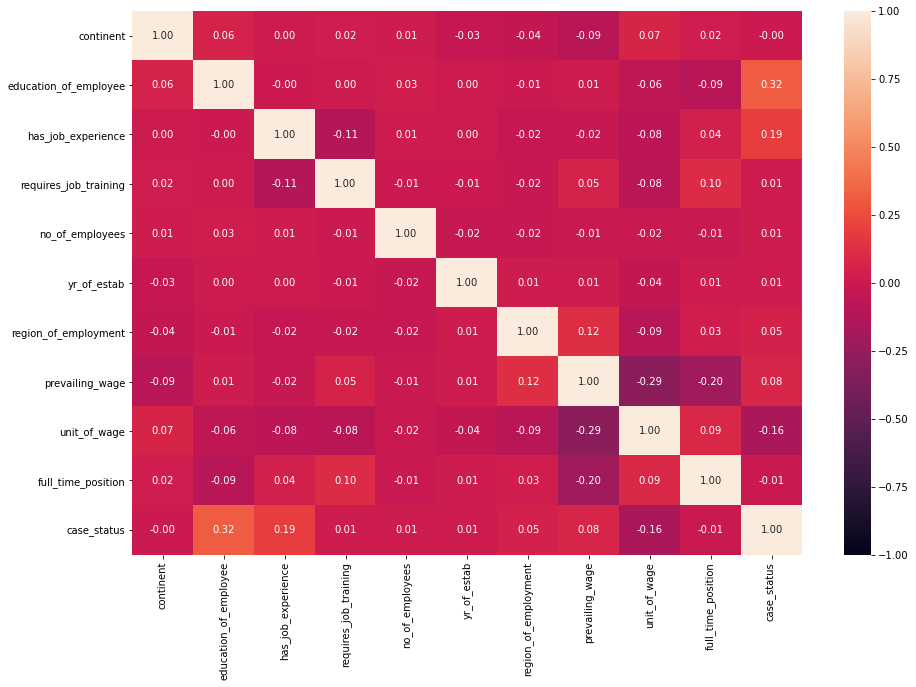

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")

* case_status has a slightly high correlation with education_of_employee and has_job_experience followed by prevailing_wage. 
* case_status has a slight negative correlation with unit_of_wage.

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting a case is Certified when it is Denied.
2. Predicting a case is Denied when it is Certified.

### Which case is more important? 
* Both cases are important. 
1. If the model predicts a case is Certified but it is Denied then the applicant would have false hopes and start to prepare for the move by spending lots of money, which in the end would be a waste.
2. If the model predicts a case is Denied but it is Certified then the applicant could lose his chance to move as he would have made other decisions and not be prepared for a move. 

### Which metric to optimize?
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Model Building - Bagging

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.653977  0.740255   0.741271  0.740763


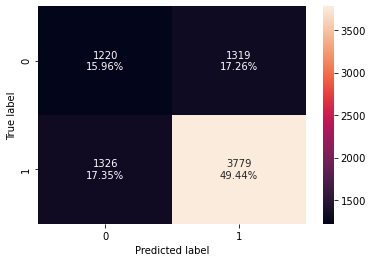

<IPython.core.display.Javascript object>

In [64]:
# Fitting the model
d_tree = DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.33}, random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.725275  0.847209   0.766165  0.804651


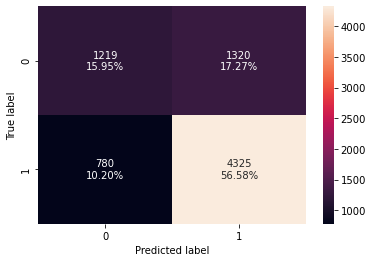

<IPython.core.display.Javascript object>

In [65]:
# Fitting the model
rf_estimator = RandomForestClassifier(class_weight={0: 0.66, 1: 0.33}, random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984526  0.984723   0.992051  0.988373
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.690738  0.765328   0.770156  0.767734


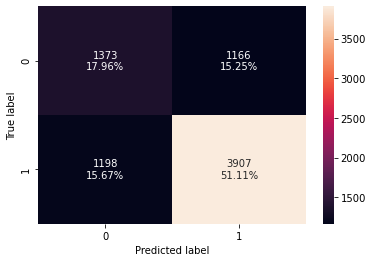

<IPython.core.display.Javascript object>

In [66]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### Bagging Model Performance

In [67]:
# Performance comparison of Bagging models

bagging_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        d_tree_model_test_perf.T,
        rf_estimator_model_train_perf.T,
        rf_estimator_model_test_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_model_test_perf.T,
    ],
    axis=1,
)
bagging_comp_df.columns = [
    "Decision Tree (train)",
    "Decision Tree (test)",
    "Random Forest (train)",
    "Random Forest (test)",
    "Bagging Classifier (train)",
    "Bagging Classifier (test)",
]
print("Training performance comparison:")
bagging_comp_df

Training performance comparison:


,Decision Tree (train),Decision Tree (test),Random Forest (train),Random Forest (test),Bagging Classifier (train),Bagging Classifier (test)
Accuracy,1.0,0.653977,1.0,0.725275,0.984526,0.690738
Recall,1.0,0.740255,1.0,0.847209,0.984723,0.765328
Precision,1.0,0.741271,1.0,0.766165,0.992051,0.770156
F1,1.0,0.740763,1.0,0.804651,0.988373,0.767734


<IPython.core.display.Javascript object>

Decision Tree, Random Forest and Bagging Classifiers were run. 
* Training set is overfit in all 3 models because all the scores are 1 (or close to 1) and all the scores are low compared to the train set scores.
* Random forest classifier gives better performance among the 3 models in terms of F1, Recall. 

# Model Improvement - Bagging

### Hyperparameter Tuning of Decision Tree Classifier

In [68]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.66, 1: 0.33}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.33}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision        F1
0  0.667919     1.0   0.667919  0.800901
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.667844     1.0   0.667844  0.800847


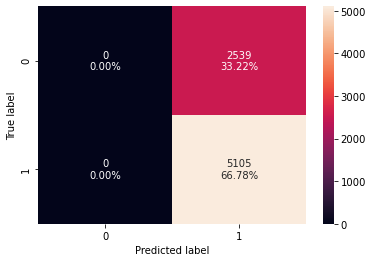

<IPython.core.display.Javascript object>

In [69]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

### Hyperparameter Tuning of Random Forest Classifier

In [70]:
### Hyperparameter Tuning

# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.66, 1: 0.33}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(3, 10, 2)),
    "max_features": [0.1, 0.5, 0.7],
    "min_samples_leaf": np.arange(1, 15, 5),
    "n_estimators": np.arange(10, 100, 10),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.66, 1: 0.33}, max_depth=9,
                       max_features=0.1, n_estimators=50, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75998  0.794846    0.83752  0.815625
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.721088  0.767679    0.80555  0.786158


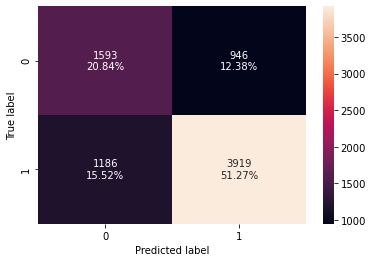

<IPython.core.display.Javascript object>

In [71]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Hyperparameter Tuning of Bagging Classifier

In [72]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.993721  0.998993   0.991667  0.995317
   Accuracy    Recall  Precision        F1
0  0.718864  0.881489    0.74454  0.807247


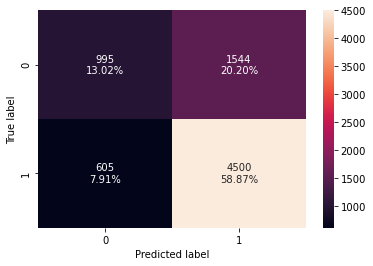

<IPython.core.display.Javascript object>

In [73]:
# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print(bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Bagging Tuned Model Performance

In [91]:
bagging_tuned_comp_df = pd.concat(
    [
        dtree_estimator_model_train_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_tuned_model_train_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
    ],
    axis=1,
)
bagging_tuned_comp_df.columns = [
    "Decision Tree Tuned(train)",
    "Decision Tree Tuned(test)",    
    "Random Forest Tuned(train)",
    "Random Forest Tuned(test)",    
    "Bagging Classifier Tuned (train)",
    "Bagging Classifier Tuned (test)",
    ]
print("Bagging tuned model performance comparison:")
bagging_tuned_comp_df



Bagging tuned model performance comparison:


,Decision Tree Tuned(train),Decision Tree Tuned(test),Random Forest Tuned(train),Random Forest Tuned(test),Bagging Classifier Tuned (train),Bagging Classifier Tuned (test)
Accuracy,0.667919,0.667844,0.759980,0.721088,0.993721,0.718864
Recall,1.000000,1.000000,0.794846,0.767679,0.998993,0.881489
Precision,0.667919,0.667844,0.837520,0.805550,0.991667,0.744540
F1,0.800901,0.800847,0.815625,0.786158,0.995317,0.807247


<IPython.core.display.Javascript object>

Decision Tree, Random Forest and Bagging Classifiers were run with tuned hyperparameters. 
* Overfitting is not found in Tuned Decision Tree and Tuned Random Forest models.
* Tuned Bagging Estimator is overfit.
* Tuned Random Forest model gives best performance among all of the Tuned Bagging models. 
* It is still not as good as the default Bagging models.

# Model Building - Boosting

## AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.738619  0.887518   0.760921  0.819358
   Accuracy   Recall  Precision        F1
0  0.732993  0.88286   0.757479  0.815378


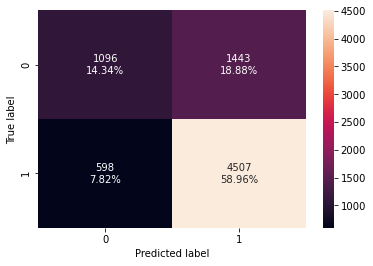

<IPython.core.display.Javascript object>

In [75]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757625  0.896668   0.775519  0.831705
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.742674  0.886582   0.765303  0.82149


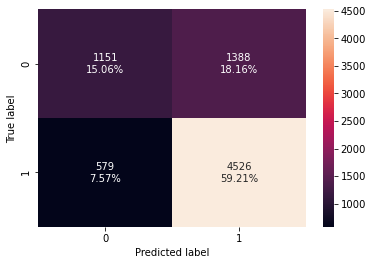

<IPython.core.display.Javascript object>

In [76]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.839089  0.931923   0.843553  0.885539
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73247  0.858178   0.768327  0.810771


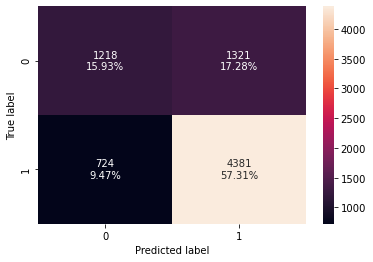

<IPython.core.display.Javascript object>

In [77]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

### Boosting Model Performance

In [78]:
boosting_comp_df = pd.concat(
    [
        ab_classifier_model_train_perf.T,
        ab_classifier_model_test_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_model_test_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_classifier_model_test_perf.T,
    ],
    axis=1,
)

boosting_comp_df.columns = [
    "Adaboost Classifier (train)",
    "Adabosst Classifier (test)",
    "Gradient Boost Classifier (train)",
    "Gradient Boost Classifier (test)",
    "XGBoost Classifier (train)",
    "XGBoost Classifier (test)",
]
print("Boosting performance comparison:")
boosting_comp_df

Boosting performance comparison:


,Adaboost Classifier (train),Adabosst Classifier (test),Gradient Boost Classifier (train),Gradient Boost Classifier (test),XGBoost Classifier (train),XGBoost Classifier (test)
Accuracy,0.738619,0.732993,0.757625,0.742674,0.839089,0.732470
Recall,0.887518,0.882860,0.896668,0.886582,0.931923,0.858178
Precision,0.760921,0.757479,0.775519,0.765303,0.843553,0.768327
F1,0.819358,0.815378,0.831705,0.821490,0.885539,0.810771


<IPython.core.display.Javascript object>

AdaBoost, Gradient Boost and XGBoost Boosting Classifiers were run with default hyperparameters. 
* Overfitting is not found in AdaBoost and Gradient Boost classifiers.
* XGBoost Classifier is slightly overfit.
* Gradient Boost Classifier model gives best performance among all of the Boosting Classifiers. 
* It is giving better scores than all of the Bagging Classifier models (default and Tuned).

# Model Improvement - Boosting

### Hyperparameter Tuning of AdaBoost Classifier

In [79]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
    ],
    "n_estimators": np.arange(10, 100, 10),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.30000000000000004, n_estimators=30,
                   random_state=1)

<IPython.core.display.Javascript object>

   Accuracy    Recall  Precision        F1
0  0.744505  0.911525   0.756092  0.826565
   Accuracy    Recall  Precision       F1
0  0.735479  0.908521    0.74891  0.82103


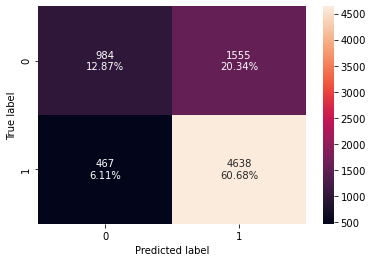

<IPython.core.display.Javascript object>

In [80]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

### Hyperparameter Tuning of GBC

In [81]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200],
    "subsample": [0.2, 0.8, 1],
    "max_features": [0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757008  0.889449   0.778374  0.830212
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74359  0.881489   0.768574  0.821168


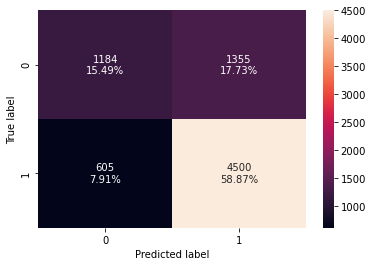

<IPython.core.display.Javascript object>

In [82]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

### Hyperparameter Tuning of XBG Classifier

In [83]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.762615  0.90204   0.777963  0.835419
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743851  0.889128   0.765301  0.822581


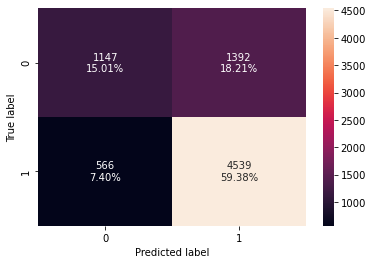

<IPython.core.display.Javascript object>

In [84]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

## Stacking Classifier

In [85]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.66,
                                                                     1: 0.33},
                                                       max_depth=9,
                                                       max_features=0.1,
                                                       n_estimators=50,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
       

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760709  0.874927   0.789561  0.830055
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739534  0.860921   0.774313  0.815323


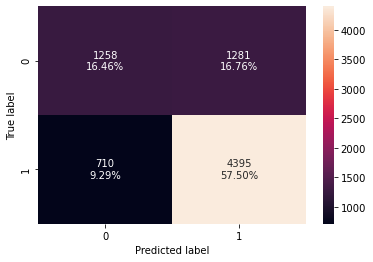

<IPython.core.display.Javascript object>

In [86]:
# Calculating different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Boosting Tuned Model Performance

In [87]:
boosting_tuned_comp_df = pd.concat(
    [
        abc_tuned_model_train_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_tuned_model_train_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_tuned_model_train_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_train_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
boosting_tuned_comp_df.columns = [
    "Adaboost Classifier tuned (train)",
    "Adabosst Classifier tuned (test)",
    "Gradient Boost Classifier tuned (train)",
    "Gradient Boost Classifier tuned (test)",
    "XGBoost Classifier tuned (train)",
    "XGBoost Classifier tuned (test)",
    "Stacking Classifier (train)",
    "Stacking Classifier (test)",
]
print("Boosting Tuned performance comparison:")
boosting_tuned_comp_df

Boosting Tuned performance comparison:


,Adaboost Classifier tuned (train),Adabosst Classifier tuned (test),Gradient Boost Classifier tuned (train),Gradient Boost Classifier tuned (test),XGBoost Classifier tuned (train),XGBoost Classifier tuned (test),Stacking Classifier (train),Stacking Classifier (test)
Accuracy,0.744505,0.735479,0.757008,0.743590,0.762615,0.743851,0.760709,0.739534
Recall,0.911525,0.908521,0.889449,0.881489,0.902040,0.889128,0.874927,0.860921
Precision,0.756092,0.748910,0.778374,0.768574,0.777963,0.765301,0.789561,0.774313
F1,0.826565,0.821030,0.830212,0.821168,0.835419,0.822581,0.830055,0.815323


<IPython.core.display.Javascript object>

AdaBoost, Gradient Boost and XGBoost Boosting Classifiers were run with hypertuned hyperparameters. Stacking Classifier was run with the tuned models.
* Overfitting is not found in any of the models.
* Stacking Classifier is slightly overfit.
* Gradient Boost Classifier tuned model gives best performance among all of the Tuned Boosting Classifiers. 
* It is giving similar F1 score as the Gradient Boost Classifier with default parameters.

## Comparing all models

In [92]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest ",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.667919,1.0,0.759980,0.984526,0.993721,0.738619,0.744505,0.757625,0.757008,0.839089,0.762615,0.760709
Recall,1.0,1.000000,1.0,0.794846,0.984723,0.998993,0.887518,0.911525,0.896668,0.889449,0.931923,0.902040,0.874927
Precision,1.0,0.667919,1.0,0.837520,0.992051,0.991667,0.760921,0.756092,0.775519,0.778374,0.843553,0.777963,0.789561
F1,1.0,0.800901,1.0,0.815625,0.988373,0.995317,0.819358,0.826565,0.831705,0.830212,0.885539,0.835419,0.830055


<IPython.core.display.Javascript object>

In [93]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Classifier Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Classifier Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.653977,0.667844,0.725275,0.721088,0.690738,0.718864,0.732993,0.735479,0.742674,0.743590,0.732470,0.743851,0.739534
Recall,0.740255,1.000000,0.847209,0.767679,0.765328,0.881489,0.882860,0.908521,0.886582,0.881489,0.858178,0.889128,0.860921
Precision,0.741271,0.667844,0.766165,0.805550,0.770156,0.744540,0.757479,0.748910,0.765303,0.768574,0.768327,0.765301,0.774313
F1,0.740763,0.800847,0.804651,0.786158,0.767734,0.807247,0.815378,0.821030,0.821490,0.821168,0.810771,0.822581,0.815323


<IPython.core.display.Javascript object>

On comparing all models we can see that:

* **Accuracy** is similar in all Bagging and Boosting models and lower in Decision Tree models.
* **Recall** is highest in Tuned Decision Tree Classifier (1.00), followed by Tuned AdaBoost Classifier(0.90)
* **Precision** is similar in all Bagging and Boosting models and slightly lower in Tuned Decision Tree model.
* **F1 score** is higher in Boosting models than Bagging models. 

* There is almost no overfitting in AdaBoost and Gradient Boost models (both default and tuned). AdaBoost is very slightly overfitting than Gradient Boost models.

**On comparing all metrics we can conclude that Gradient Boost Classifier and Tuned Gradient Boost Classifiers are giving the best and very similar F1 scores (and other metrics too) with least overfitting.**

### Feature importance of Tuned Gradient Boost Classifier

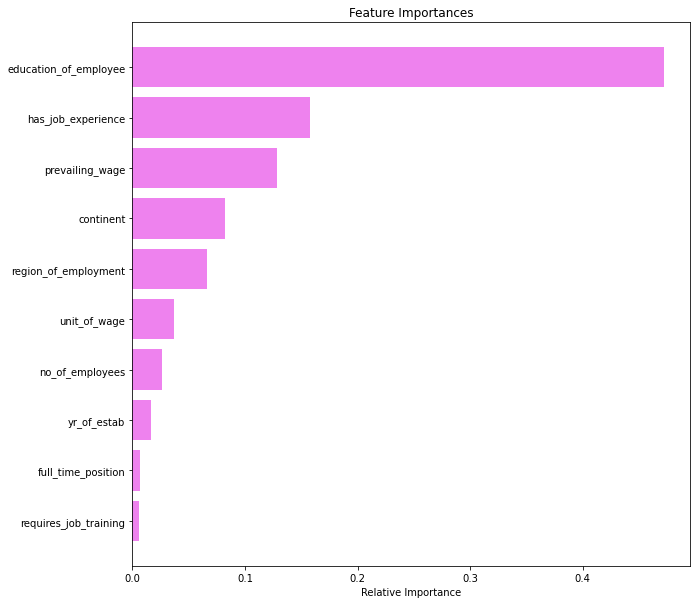

<IPython.core.display.Javascript object>

In [90]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* education_of_employee is the most important feature followed by has_job_experience.
* This is also seen in the correlation heat map that case_status has relatively higher correlation with these 2 variables. 
* full_time_position and requires_job_training are least important.



**Profile for the applicants for whom the visa should be Certified:**
* continent: Europe
* education_of_employee: Doctorate or Master's
* has_job_experience: Yes
* requires_job_training: No
* no_of_employees: Not significant
* yr_of_estab: Year Not significant
* region_of_employment: Midwest
* prevailing_wage: since the range includes all units of pay, will need additional information for conversions and precise comparisions
* unit_of_wage: Year
* full_time_position: Yes


**Profile for the applicants for whom the visa should be Denied:**
* continent: Not significant
* education_of_employee: High School 
* has_job_experience: No
* requires_job_training: No
* no_of_employees: Not significant
* yr_of_estab: Year Not significant
* region_of_employment: Island
* prevailing_wage: since the range includes all units of pay, will need additional information for conversions and precise comparisions 
* unit_of_wage: Hour
* full_time_position: Not significant

A combination of all these features with most importance given to Education and Job Experience of the applicant will help in easier prediction of the visa status.

## Actionable Insights  

* Hyperparameter tuning doesn't always improve performance. 
* Bagging classifiers tend to overfit a little more than Boosting classifiers.
* Stacking classifier combines various models but doesn't give the best performance and there is slight overfitting.
* Education and Job Experience of the applicant are the most important driving factors in the visa approval process.
* Prevailing wage ranges from 0 to about 300,000 irrespective of the unit of wage.
* More information is needed on working hours/days to convert the wage to a common unit to make fair predictions.

## Recommendations

* To make better predictions wage could be a very important feature. Wage with 1 unit for all will help in deciding the certification better.
* More strong driving features such as nature of the job, family status, employment rate in the region of employment, name of employment will help in more precise predictions.
* To improve business higher rate of correct predictions can be obtained with above mentioned features and a larger dataset.
* Post articles about past and current trends in visa approvals.
* Based on the predictions post about future expected trends. 
* Provide Tips to applicants on filing the application to get a better chance of visa approval.
* Bring awareness to the people about future employment chances in the US based on the field and nature of jobs. 


## Conclusion

Various Bagging and Boosting models were built to predict the visa certification. Education of the employee and job experience have shown to be the important driving factors on deciding the approval. Different metrics were compared and Gradient Boost Classifier and Tuned Gradient Boost Classifiers gave the best and very similar F1 scores (and other metrics too) with least overfitting.